In [1]:
import nltk

# Import brown corpus

from nltk.corpus import brown

/Users/vaps/miniconda3/envs/PLN/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
len(brown.sents(fileids=['cr09']))

99

In [3]:
len(brown.words('cr09'))

2332

In [4]:
len(brown.raw('cr09'))

19645

In [5]:
romance_text = brown.words(categories='romance')

fdist_r = nltk.FreqDist(romance_text)

In [6]:
from nltk import FreqDist


# Frequency of word love in romance text corpus

romance_text.count('love')

32

In [7]:
fdist_r['love']

32

In [8]:
text_r_lower = [w.lower() for w in romance_text]

fdist_rl = nltk.FreqDist(text_r_lower)

In [9]:
fdist_rl['love']

36

In [10]:
fdist_rl['president']

10

In [11]:
news_text = brown.words(categories='news')

fdist_n = nltk.FreqDist(news_text)

news_r_lower = [w.lower() for w in news_text]

fdist_nr = nltk.FreqDist(news_r_lower)

In [12]:
fdist_nr['love']

3

In [13]:
fdist_nr['president']

142

In [14]:
fdist_n['president']

53

In [15]:
import nltk

f = open('/Users/vaps/Downloads/EXCELSIOR_100_files/e960401_mod.htm', encoding='utf-8')
text = f.read()
f.close()

words = nltk.word_tokenize(text)


print(type(words))

print(len(words))

print(words[:200])

<class 'list'>
61505
['<', '!', 'DOCTYPE', 'html', '>', '<', 'html', "lang='es", "'", '>', '<', 'head', '>', '<', 'meta', "charset='UTF-8", "'", '>', '<', 'title', '>', 'e960401_mod.htm', '<', '/title', '>', '<', '/head', '>', '<', 'body', '>', 'http', ':', '//www.excelsior.com.mx/9604/960401/art01.html', '<', 'title', '>', 'Excelsior', ':', 'Editorial', '<', '/title', '>', '<', 'basefont', 'size=', "''", '3', "''", '>', '<', 'img', 'src=', "''", '/gifs/ban_editorial.gif', "''", '>', '<', 'hr', '>', '<', 'h5', 'align=', "''", 'right', "''", '>', 'Martes', '02', 'de', 'Abril', 'de', '1996', '<', '/h5', '>', '<', 'h3', '>', 'Monstruosa', 'Diferencia', '<', '/h3', '>', '<', 'p', '>', '<', '/p', '>', '<', 'p', '>', '<', 'b', '>', 'Colosistas', 'y', 'Colosismo', '<', '/b', '>', '<', '/p', '>', '<', 'p', '>', '<', '/p', '>', '<', 'p', '>', '<', 'b', '>', 'LUIS', 'GUTIERREZ', 'Y', 'GONZALEZ', '<', '/b', '>', '<', '/p', '>', '<', 'p', '>', '<', '/p', '>', '<', 'p', '>', 'A', 'Luis', 'Gutiérrez

In [16]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(text, 'lxml')

text = soup.get_text()


words = text.split()

print(type(text))

print(len(text))

print(words[:200])

<class 'str'>
273551
['e960401_mod.htm', 'http://www.excelsior.com.mx/9604/960401/art01.html', 'Excelsior:', 'Editorial', 'Martes', '02', 'de', 'Abril', 'de', '1996', 'Monstruosa', 'Diferencia', 'Colosistas', 'y', 'Colosismo', 'LUIS', 'GUTIERREZ', 'Y', 'GONZALEZ', 'A', 'Luis', 'Gutiérrez', 'Sotomayor', 'y', 'a', 'Federico', 'Arreola,', 'colosistas', 'cabales,', 'según', 'me', 'dijo', 'su', 'amigo', 'Luis', 'Donaldo.', 'CIERTAMENTE,', 'el', 'nombre', 'y', 'las', 'circunstancias', 'de', 'Luis', 'Donaldo', 'Colosio', 'han', 'llenado', 'insistentemente', 'los', 'volúmenes', 'y', 'los', 'espacios', 'de', 'los', 'medios', 'de', 'comunicación.', 'Pero', 'su', 'renovada', 'actualidad', 'ha', 'padecido', 'un', 'frenético', 'vaivén', 'de', 'ficciones', 'judiciales', 'y', 'políticas', 'que', 'integran', 'y', 'disgregan', 'metafísicas', 'más', 'metafísicas', 'aún', 'que', 'las', 'que', 'Luis', 'Donaldo', 'desprende', '—o', 'se', 'envuelve', 'con', 'ellas—', 'al', 'otro', 'lado', 'del', 'espejo.', 

In [19]:
import mechanize
import nltk
from bs4 import BeautifulSoup
from html2text import html2text 
import re


def clean_html(html):
    """
    Copied from NLTK package.
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    return cleaned.strip()

url = "http://www.nytimes.com/2015/08/31/business/challenged-on-left-and-right-the-fed-faces-a-decision-on-rates.html"
br = mechanize.Browser()
br.set_handle_robots(False)
br.addheaders = [('User-agent', 'Firefox')]
html = br.open(url).read().decode('utf-8')
cleanhtml = clean_html(html)
text = html2text(cleanhtml)
soup = BeautifulSoup(html)
text2 = soup.get_text()

In [20]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [21]:
genre_word = [(genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)]

In [22]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [23]:
cfd

<ConditionalFreqDist with 2 conditions>

In [24]:
cfd.conditions()

['news', 'romance']

In [25]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [26]:
cfd['romance']

FreqDist({',': 3899, '.': 3736, 'the': 2758, 'and': 1776, 'to': 1502, 'a': 1335, 'of': 1186, '``': 1045, "''": 1044, 'was': 993, ...})

In [27]:
list(cfd['romance'])

[',',
 '.',
 'the',
 'and',
 'to',
 'a',
 'of',
 '``',
 "''",
 'was',
 'I',
 'in',
 'he',
 'had',
 '?',
 'her',
 'that',
 'it',
 'his',
 'she',
 'with',
 'you',
 'for',
 'at',
 'He',
 'on',
 'him',
 'said',
 '!',
 '--',
 'be',
 'as',
 ';',
 'have',
 'but',
 'not',
 'would',
 'She',
 'The',
 'out',
 'were',
 'up',
 'all',
 'from',
 'could',
 'me',
 'like',
 'been',
 'so',
 'there',
 'they',
 'one',
 'about',
 'my',
 'an',
 'or',
 'is',
 'this',
 'It',
 'them',
 'if',
 'into',
 'But',
 'And',
 'down',
 'when',
 'back',
 'no',
 'what',
 'did',
 'their',
 'do',
 'by',
 'only',
 'your',
 'thought',
 'which',
 'You',
 "didn't",
 'then',
 'just',
 'little',
 'time',
 'too',
 'get',
 'who',
 'got',
 'before',
 'know',
 'over',
 'man',
 'because',
 'more',
 'never',
 'way',
 'now',
 'went',
 'we',
 "I'm",
 'eyes',
 'go',
 'came',
 'see',
 'can',
 'old',
 'come',
 'even',
 'are',
 'looked',
 'other',
 'They',
 'its',
 'knew',
 'some',
 'much',
 'around',
 'any',
 'There',
 'here',
 'long',
 'tha

In [29]:
cfd = nltk.ConditionalFreqDist( 
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'romance'] 
modals = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'] 

cfd.tabulate(conditions=genres, samples=modals)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


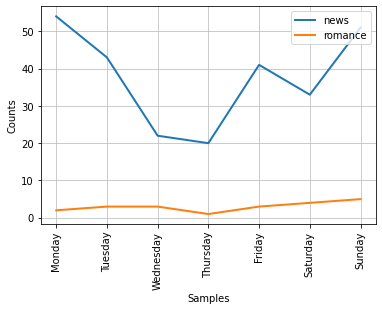

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
cfd.plot(conditions=genres, samples=modals)